In [1]:
from hypernodes import NodeRegistry

registry = NodeRegistry()

In [2]:
node_name = "parent_node"
node = registry.create_or_get(node_name)

Loaded existing node "parent_node" from tests/nodes/parent_node/artifacts


# Define Config & DAG

In [3]:
from hypster import HP, config


@config
def my_config(hp: HP):
    from hypernodes import NodeRegistry

    node_registry_path = hp.text_input("conf/node_registry.yaml")
    registry = NodeRegistry(registry_path=node_registry_path)

    nested_node = registry.load("basic_usage")
    nested_node._instantiated_config = hp.propagate(nested_node.hypster_config, name="basic_usage")

    downstream_node = registry.mock("downstream")
    input = hp.text_input("testing")

In [4]:
inputs = my_config()

In [5]:
inputs

{'node_registry_path': 'conf/node_registry.yaml',
 'registry': <hypernodes.registry.NodeRegistry at 0x11804e2f0>,
 'nested_node': <hypernodes.hypernode.HyperNode at 0x10757f370>,
 'downstream_node': <hypernodes.hypernode.HyperNode at 0x1076f2200>,
 'input': 'testing'}

In [6]:
node.save_hypster_config(my_config)

`my_config` is saved as a hypster config for "parent_node"


In [7]:
%load_ext hamilton.plugins.jupyter_magic

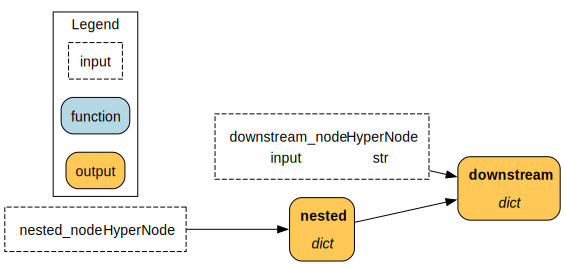

In [8]:
%%cell_to_module dag --display --execute --inputs inputs --hide
from hypernodes import HyperNode
from hamilton.function_modifiers import config


def nested(nested_node: HyperNode) -> dict:
    nested_node.instantiate()
    return nested_node.execute()


def downstream(downstream_node: HyperNode, nested: dict, input: str) -> dict:
    downstream_node.instantiate()
    results = downstream_node.execute()
    return nested["query"] + " " + input

In [9]:
node.save_dag(dag)

`dag` is saved as a hamilton DAG for "parent_node"


# Load the nested Node and get upstream inputs

In [10]:
registry = NodeRegistry()
node_name = "downstream_node"
node = registry.create_or_get(node_name, f"tests/nodes/{node_name}/artifacts")

Loaded existing node "downstream_node" from tests/nodes/downstream_node/artifacts


## Upstream Inputs

In [11]:
parent_node_name = "parent_node"
parent_node = registry.load(parent_node_name)
parent_node.instantiate()

In [12]:
upstream_inputs = parent_node.get_node_inputs("downstream")
upstream_inputs

{'downstream_node': <hypernodes.hypernode.HyperNode at 0x1076f20b0>,
 'nested': {'query': 'Querying claude-3-haiku-20240307...'},
 'input': 'testing'}